In [2]:
import pandas as pd
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt
import statsmodels.api as sm
import QuantLib as ql

print("Tutte le librerie sono state caricate correttamente!")

Tutte le librerie sono state caricate correttamente!


In [3]:
# 1. Creiamo la tabella nel modo più semplice possibile
dati = {
    'Col0': [1, 3, 5, 7, 9, 11],
    'Col1': [2, 4, 6, 8, 10, 12]
}
nomi_righe = ['Idx0', 'Idx1', 'Idx2', 'Idx3', 'Idx4', 'Idx5']

tabella = pd.DataFrame(dati, index=nomi_righe)
print("Tabella originale:")
print(tabella)

# 2. Prima modifica: riga 3, colonna 1 (zero-based)
# Usiamo 'iloc' quando vogliamo cercare usando i NUMERI delle posizioni
valore_vecchio_1 = tabella.iloc[3, 1]
tabella.iloc[3, 1] = valore_vecchio_1 + 1

# 3. Seconda modifica: incrocio tra "Idx0" e "Col1"
# Usiamo 'loc' quando vogliamo cercare usando i NOMI delle righe/colonne
valore_vecchio_2 = tabella.loc['Idx0', 'Col1']
tabella.loc['Idx0', 'Col1'] = valore_vecchio_2 + 2

print("\nTabella finale modificata:")
print(tabella)

Tabella originale:
      Col0  Col1
Idx0     1     2
Idx1     3     4
Idx2     5     6
Idx3     7     8
Idx4     9    10
Idx5    11    12

Tabella finale modificata:
      Col0  Col1
Idx0     1     4
Idx1     3     4
Idx2     5     6
Idx3     7     9
Idx4     9    10
Idx5    11    12


In [4]:
x = 0.4

# Calcoliamo prima la parte sopra la linea di frazione
parte_sopra = x * np.sinh(x)

# Calcoliamo la parte sotto la linea di frazione
esponente = (x ** 2) / 2
parte_sotto = 1 + np.exp(esponente)

# Facciamo la divisione e poi il logaritmo
divisione = parte_sopra / parte_sotto
risultato = np.log(divisione)

print("Il risultato del calcolo è:", risultato)

Il risultato del calcolo è: -2.5400025589406656


In [ ]:
mu = 1

# Scriviamo la formula in una funzione semplice
def calcola_formula(x):
    esponente = -((x - mu) ** 2) / 2 # Abbiamo aggiunto un meno per rendere il problema realizzabile
    risultato = -x * np.exp(esponente)
    # Restituiamo il risultato con il segno MENO per trovare il massimo
    return risultato 

# Facciamo fare il calcolo a Scipy
ottimizzazione = opt.minimize_scalar(calcola_formula)

punto_x = ottimizzazione.x
# Rimettiamo il meno per far tornare il valore in positivo
valore_massimo = -ottimizzazione.fun 

print("Il punto massimo si trova a x =", punto_x)
print("Il valore massimo è =", valore_massimo)

Il punto massimo si trova a x = 1.6180339988009027
Il valore massimo è = 1.336733323596827


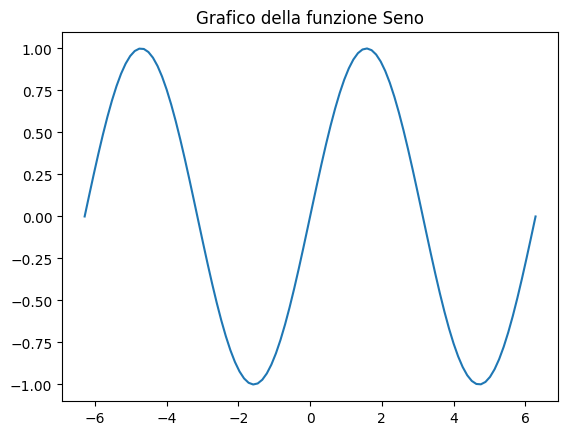

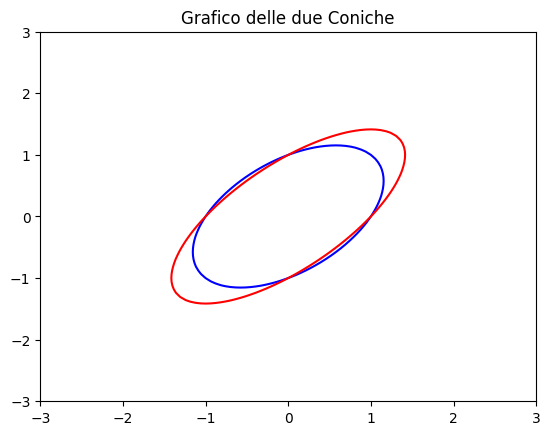

In [6]:
# --- GRAFICO 1: Il Seno ---
# Creiamo 100 numeri che vanno da -2pi a +2pi
x_valori = np.linspace(-2 * np.pi, 2 * np.pi, 100)
y_valori = np.sin(x_valori)

plt.figure() # Crea un nuovo disegno bianco
plt.plot(x_valori, y_valori)
plt.title("Grafico della funzione Seno")
plt.show() # Mostra il disegno

# --- GRAFICO 2: Le Coniche ---
# Per le formule con x e y mescolati, dobbiamo creare una "griglia" di punti
x_griglia = np.linspace(-3, 3, 100)
y_griglia = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x_griglia, y_griglia)

rho_1 = 1 / 2
rho_2 = 1 / np.sqrt(2)

# Scriviamo le due equazioni
formula_1 = (X ** 2) - (2 * rho_1 * X * Y) + (Y ** 2)
formula_2 = (X ** 2) - (2 * rho_2 * X * Y) + (Y ** 2)

plt.figure()
# Il comando 'contour' disegna solo le linee dove la formula è esattamente uguale a 1
plt.contour(X, Y, formula_1, levels=[1], colors='blue')
plt.contour(X, Y, formula_2, levels=[1], colors='red')
plt.title("Grafico delle due Coniche")
plt.show() # Mostra il disegno


In [7]:
# Prendiamo solo le prime 5 righe della tabella creata nel Punto A
prime_5_righe = tabella.head(5)

# Prepariamo i dati: la Colonna 0 è la X, la Colonna 1 è la Y
X = prime_5_righe['Col0']
Y = prime_5_righe['Col1']

# Questa è una regola fissa di questa libreria: bisogna aggiungere una "costante"
X_pronta = sm.add_constant(X)

# Creiamo il modello lineare e calcoliamolo
modello = sm.OLS(Y, X_pronta)
risultati = modello.fit()

print("I parametri calcolati sono:")
print(risultati.params)

I parametri calcolati sono:
const    2.35
Col0     0.85
dtype: float64


In [9]:
# 1. Frazione di anno
data_inizio = ql.Date(19, 2, 2008)
data_fine = ql.Date(19, 5, 2008)

# Diciamo al programma di usare la regola Europea
regola_giorni = ql.Thirty360(ql.Thirty360.European)
frazione = regola_giorni.yearFraction(data_inizio, data_fine)

print("Frazione d'anno calcolata:", frazione)

# 2. Calendario
data_partenza = ql.Date(31, 10, 2025)
calendario = ql.TARGET()

print("\nDate dei prossimi 6 mesi (Modified Following):")
# Usiamo un semplice ciclo per stampare i prossimi 6 mesi
for numero_mese in range(7):
    # 'advance' sposta semplicemente la data in avanti di tot mesi
    nuova_data = calendario.advance(data_partenza, numero_mese, ql.Months, ql.ModifiedFollowing)
    print("Mese", numero_mese, "->", nuova_data)

Frazione d'anno calcolata: 0.25

Date dei prossimi 6 mesi (Modified Following):
Mese 0 -> October 31st, 2025
Mese 1 -> November 28th, 2025
Mese 2 -> December 31st, 2025
Mese 3 -> January 30th, 2026
Mese 4 -> February 27th, 2026
Mese 5 -> March 31st, 2026
Mese 6 -> April 30th, 2026
